In [1]:
import pandas as pd
from pyarrow import parquet as pq

In [2]:
df = pq.read_table("/Users/admin/softeer_de_wiki/mission/W4/m2/shared/data/fhv_tripdata_2024_1278/fhvhv_tripdata_2024-01.parquet").to_pandas()
taxi_zone = pd.read_csv("/Users/admin/softeer_de_wiki/mission/W4/m2/shared/data/taxi_zone_lookup.csv")

In [3]:
df.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,...,4.05,2.75,0.0,0.0,40.18,N,N,N,N,N
1,HV0003,B03404,B03404,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,...,0.89,2.75,0.0,0.0,6.12,N,N,N,N,N
2,HV0003,B03404,B03404,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,...,1.60,2.75,0.0,0.0,9.47,N,N,N,N,N
3,HV0003,B03404,B03404,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,...,1.52,2.75,0.0,0.0,11.35,N,N,N,N,N
4,HV0003,B03404,B03404,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,...,3.43,2.75,0.0,0.0,28.63,N,N,N,N,N


In [4]:
taxi_zone.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [5]:
# check null values
df.isnull().sum()

# 손님 수가 0인 행 삭제

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5218737
request_datetime              0
on_scene_datetime       5218737
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663930 entries, 0 to 19663929
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [7]:
df.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,19663930,14445193,19663930,19663930,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07,1.966393e+07
mean,2024-01-16 22:16:37.965603,2024-01-17 02:22:41.626253,2024-01-16 22:20:45.530691,2024-01-16 22:39:15.999917,1.391361e+02,1.424193e+02,4.838587e+00,1.110470e+03,2.395925e+01,1.055207e+00,6.905130e-01,2.026125e+00,1.075129e+00,1.922252e-01,1.058256e+00,1.826909e+01
min,2023-12-31 23:01:55,2023-12-31 22:55:22,2024-01-01 00:00:00,2024-01-01 00:02:35,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.309000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.776000e+01
25%,2024-01-09 14:57:44,2024-01-09 18:12:25,2024-01-09 15:01:51,2024-01-09 15:22:16,7.500000e+01,7.600000e+01,1.493000e+00,5.710000e+02,1.163000e+01,0.000000e+00,3.200000e-01,9.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.210000e+00
50%,2024-01-17 08:05:05.500000,2024-01-17 13:01:53,2024-01-17 08:11:56,2024-01-17 08:31:05,1.400000e+02,1.420000e+02,2.830000e+00,9.120000e+02,1.800000e+01,0.000000e+00,5.000000e-01,1.530000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.357000e+01
75%,2024-01-24 13:28:24.750000,2024-01-24 16:23:39,2024-01-24 13:31:43.750000,2024-01-24 13:52:05.750000,2.110000e+02,2.170000e+02,5.990000e+00,1.430000e+03,2.880000e+01,0.000000e+00,8.100000e-01,2.480000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.283000e+01
max,2024-02-01 00:07:07,2024-01-31 23:59:58,2024-01-31 23:59:59,2024-02-01 02:10:41,2.650000e+02,2.650000e+02,4.176200e+02,5.206000e+04,1.911160e+03,1.410200e+02,5.394000e+01,1.526900e+02,8.250000e+00,6.900000e+00,1.968000e+02,1.218170e+03
std,NaN,NaN,NaN,NaN,7.490267e+01,7.777903e+01,5.698662e+00,7.722219e+02,2.053657e+01,3.798422e+00,6.311549e-01,1.676818e+00,1.344148e+00,6.691915e-01,3.127074e+00,1.546117e+01


In [8]:
df.describe(include='O')

,hvfhs_license_num,dispatching_base_num,originating_base_num,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
count,19663930,19663930,14445193,19663930,19663930,19663930,19663930,19663930
unique,2,2,6,2,2,2,2,2
top,HV0003,B03404,B03404,N,N,N,N,N
freq,14432755,14432755,14432697,18930120,19435982,19649886,19619397,17891533


In [9]:
df['hvfhs_license_num'].value_counts()

hvfhs_license_num
HV0003    14432755
HV0005     5231175
Name: count, dtype: int64

In [10]:
df.shape

(19663930, 24)

In [11]:
columns = ['dispatching_base_num', 'originating_base_num', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']
df = df.drop(columns=columns)

# dropoff_datetime - pickup_datetime <= 0 삭제
df = df[df['dropoff_datetime'] - df['pickup_datetime'] > pd.Timedelta(0)]
# on_scene_datetime - request_datetime <= 0 삭제
df = df[df['on_scene_datetime'] - df['request_datetime'] > pd.Timedelta(0)]
# base_passenger_fare <=0 삭제
df = df[df['base_passenger_fare'] > 0]
# driver_pay < 0 삭제
df = df[df['driver_pay'] >= 0]


In [12]:
df.shape

(14309442, 17)

In [13]:
# hvfhs_license_num
# • HV0003: Uber
# • HV0005: Lyft
# 컬럼 추가
df['Taxi_Company'] = df['hvfhs_license_num'].map({
    'HV0003': 'Uber',
    'HV0005': 'Lyft'
})

In [ ]:
df['year'] = pd.to_datetime(df['pickup_datetime']).dt.year
df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['day'] = pd.to_datetime(df['pickup_datetime']).dt.day
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour

In [15]:
df['season'] = df['month'].map({
    1: 'Winter',
    2: 'Winter',
    7: 'Summer',
    8: 'Summer',
    })

In [18]:
df['PULocation'] = df['PULocationID'].map(taxi_zone.set_index('LocationID')['Borough'])
df['DOLocation'] = df['DOLocationID'].map(taxi_zone.set_index('LocationID')['Borough'])

In [ ]:
# 도착시간
df['time_to_on_scene'] = round((df['on_scene_datetime'] - df['request_datetime']).dt.total_seconds() / 60)


In [35]:
# trip_time 시간단위 변경
df['trip_time'] = (df['trip_time'] / 60).astype(int)

In [37]:
# trip_miles to kilometers
df['trip_km'] = round(df['trip_miles'] * 1.60934, 2)

In [38]:
df.head(5)

,hvfhs_license_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,...,Taxi_Company,month,day,hour,season,PULocation,DOLocation,time_to_on_scene,time_to_dropoff,trip_km
0,HV0003,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,37,45.61,...,Uber,1,1,0,Winter,Manhattan,Manhattan,3.0,38.0,4.55
1,HV0003,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,7,10.05,...,Uber,1,1,0,Winter,Manhattan,Manhattan,0.0,7.0,2.53
2,HV0003,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,12,18.07,...,Uber,1,1,0,Winter,Manhattan,Manhattan,2.0,12.0,3.19
3,HV0003,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,15,17.17,...,Uber,1,1,0,Winter,Manhattan,Manhattan,4.0,16.0,3.20
4,HV0003,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,12,38.67,...,Uber,1,1,0,Winter,Manhattan,Brooklyn,8.0,13.0,4.26


In [22]:
df.shape

(14309442, 24)

In [ ]:
# 과제 파트

# Average Trip Duration
average_trip_duration = df['time_to_dropoff'].mean().round(2)

# Average Trip Distance
average_trip_distance_km = df['trip_km'].mean().round(2)
average_trip_distance_miles = df['trip_miles'].mean().round(2)
average_trip_

# Peak Hours
peak_hours = df['pickup_datetime'].dt.hour.value_counts().sort_values(ascending=False)

In [ ]:
print("Average Trip Duration (minutes):", average_trip_duration, "minutes")
print("Average Trip Distance (km):", average_trip_distance_km, "km")
print("Average Trip Distance (miles):", average_trip_distance_miles, "miles")
print()
print("Peak Hours Distribution:")
print(pd.DataFrame(peak_hours).head(10))

Average Trip Duration (minutes): 18.49 minutes
Average Trip Distance (km): 7.79 km
Average Trip Distance (miles): 4.84 miles

Peak Hours Distribution:
                  count
pickup_datetime        
18               892247
17               861067
19               855386
20               789466
16               759711
21               757985
15               738622
22               736857
8                731419
14               720017


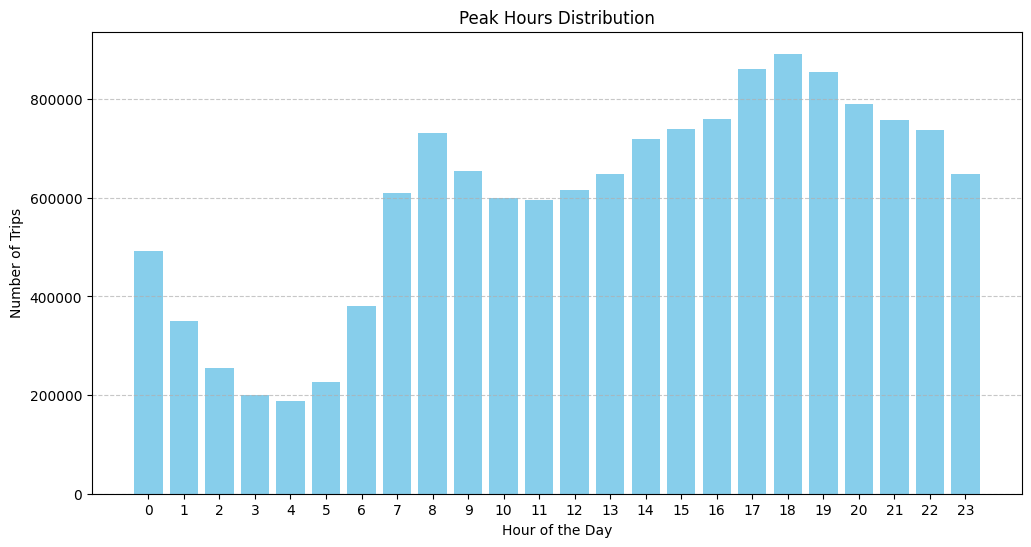

In [50]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(peak_hours.index, peak_hours.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Peak Hours Distribution')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
import glob
weather = pd.concat([pd.read_csv(f) for f in glob.glob("/Users/admin/softeer_de_wiki/mission/W4/m2/shared/data/2024_weather/*.csv")])

In [69]:
weather.head(5)

,year,month,day,max,min,precipitation1,precipitation2,precipitation3
0,2024,8,1,95,76,0.00,0.0,0.0
1,2024,8,2,92,74,0.52,0.0,0.0
2,2024,8,3,93,73,0.73,0.0,0.0
3,2024,8,4,83,71,0.17,0.0,0.0
4,2024,8,5,90,73,0.00,0.0,0.0


In [71]:
weather['precipitation1'] = weather['precipitation1'].replace('T', '0').astype(float)
weather['precipitation2'] = weather['precipitation2'].replace('T', '0').astype(float)
weather['precipitation3'] = weather['precipitation3'].replace('T', '0').astype(float)
weather['precipitation'] = weather[['precipitation1', 'precipitation2', 'precipitation3']].sum(axis=1)

weather = weather.drop(columns=['precipitation1', 'precipitation2', 'precipitation3'])

In [ ]:
weather['max_C'] = ((weather['max'] - 32) * 5 / 9).round(1)
weather['min_C'] = ((weather['min'] - 32) * 5 / 9).round(1)

In [75]:
weather = weather.rename(columns={
    'max': 'max_F',
    'min': 'min_F'
})

In [73]:
weather.head(5)

,year,month,day,max,min,precipitation,max_C,min_C
0,2024,8,1,95,76,0.00,35.0,24.4
1,2024,8,2,92,74,0.52,33.3,23.3
2,2024,8,3,93,73,0.73,33.9,22.8
3,2024,8,4,83,71,0.17,28.3,21.7
4,2024,8,5,90,73,0.00,32.2,22.8


In [78]:
# Map weather data to trip data
df = df.merge(weather, on=['year', 'month', 'day'], how='left')

In [79]:
df.head()

,hvfhs_license_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,...,DOLocation,time_to_on_scene,time_to_dropoff,trip_km,year,max_F,min_F,precipitation,max_C,min_C
0,HV0003,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,37,45.61,...,Manhattan,3.0,38.0,4.55,2024,47,35,0.03,8.3,1.7
1,HV0003,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,7,10.05,...,Manhattan,0.0,7.0,2.53,2024,47,35,0.03,8.3,1.7
2,HV0003,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,12,18.07,...,Manhattan,2.0,12.0,3.19,2024,47,35,0.03,8.3,1.7
3,HV0003,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,15,17.17,...,Manhattan,4.0,16.0,3.20,2024,47,35,0.03,8.3,1.7
4,HV0003,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,12,38.67,...,Brooklyn,8.0,13.0,4.26,2024,47,35,0.03,8.3,1.7


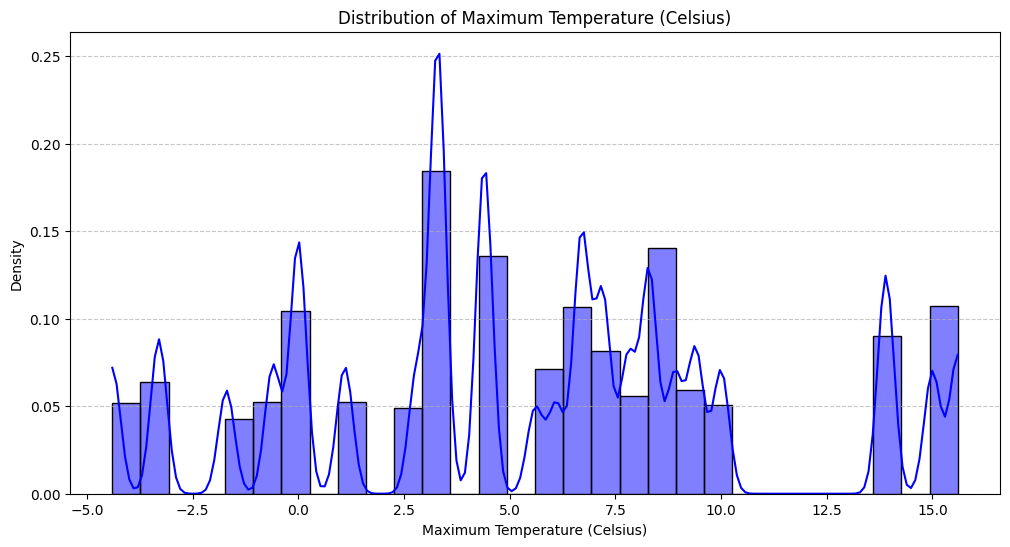

In [80]:
# 기온 구간 별 택시 사용량
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='max_C', bins=30, kde=True, color='blue', stat='density')
plt.title('Distribution of Maximum Temperature (Celsius)')
plt.xlabel('Maximum Temperature (Celsius)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

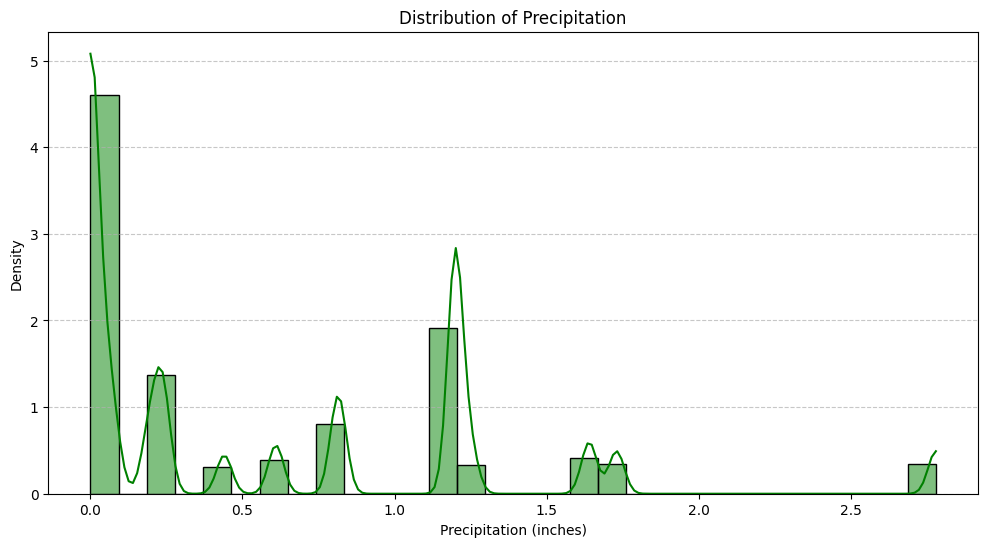

In [81]:
# 강수량 별 택시 사용량
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='precipitation', bins=30, kde=True, color='green', stat='density')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 전체 데이터 샘플링 버전

import dask.dataframe as dd

FILE_NAME_HEADER = "shared/data/fhv_tripdata_2024_1278/fhvhv_tripdata_2024-"

months = ['01', '01', '07', '08']
for month in months:
    file_path = f"{FILE_NAME_HEADER}{month}.parquet"
    ddf = dd.read_parquet(file_path)
    # Process the Dask DataFrame as needed
    # For example, you can compute it to a Pandas DataFrame if necessary
    # df = ddf.compute()

    fraction = 0.01
    sampled_df = ddf.sample(frac=fraction, random_state=42).compute()
    
    # Concatenate the sampled DataFrame to the main DataFrame
    if 'sampled_df_all' in locals():
        sampled_df_all = pd.concat([sampled_df_all, sampled_df], ignore_index=True)
    else:
        sampled_df_all = sampled_df

In [ ]:
sample_df_all = sampled_df_all.reset_index(drop=True)

In [87]:
sampled_df_all.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-01-01 01:48:48,2024-01-01 01:50:14,2024-01-01 01:51:03,2024-01-01 02:04:52,79,233,2.390,...,3.11,2.75,0.0,0.00,36.27,N,N,N,N,N
1,HV0003,B03404,B03404,2024-01-09 08:51:17,2024-01-09 08:53:57,2024-01-09 08:54:31,2024-01-09 09:07:00,71,72,1.750,...,0.95,0.00,0.0,0.00,9.34,N,N,N,N,N
2,HV0003,B03404,B03404,2024-01-01 10:34:11,2024-01-01 10:40:38,2024-01-01 10:42:16,2024-01-01 11:41:25,132,265,38.900,...,0.00,0.00,2.5,0.00,91.85,N,N,N,N,N
3,HV0005,B03406,<NA>,2024-01-10 15:44:37,NaT,2024-01-10 15:50:26,2024-01-10 16:42:09,41,255,11.411,...,3.98,2.75,0.0,0.00,44.53,N,N,N,N,N
4,HV0003,B03404,B03404,2024-01-08 08:47:58,2024-01-08 08:53:18,2024-01-08 08:53:18,2024-01-08 09:25:12,112,177,4.530,...,2.86,0.00,0.0,7.19,26.94,N,N,N,N,N


hvfhs_license_num
HV0003    572671
HV0005    203720
Name: count, dtype: int64[pyarrow]

In [ ]:
# 어떤 종류의 택시가 제일 빨리 오는지
# 가격은 어떤지
# 날씨에 따른 가격 차이
# 날씨에 따른 택시 도착 시간
# 계절별 도착 시간
# 계절별 평균 가격
# 계절별 사용자 수
# 계절별 택시 종류
# 계절별 택시 종류별 평균 가격
# 계절별 택시 종류별 평균 도착 시간
# 탑승 시간 별 요금(10분 단위)